<a href="https://colab.research.google.com/github/GenoKiller777/AprendizajeSupervisado/blob/main/KNN_CasoMailSpam_DarwinJoanPerezAvendano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
#Genera una Matriz de confusión.
def plot_cm(y_true, y_pred, figsize=(4,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0.0%'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Valores Verdaderos'
    cm.columns.name = 'Prediccion'
    fig, ax = plt.subplots(figsize=figsize)

    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

#Genera la precisión del modelo.
def val_accuracy(d_test, y_predict):

    accuracy = []
    true_value = d_test#d_test # valores verdaderos
    predictions = y_predict#y_predict # predicciones hechas por el modelo
    cont_true_val = 0

    # conteo de los valores que se predicieron correctamente
    for i in range(len(true_value)):
        if true_value[i] == predictions[i]:
            cont_true_val = cont_true_val + 1

    # calculamos el porcentaje
    result = cont_true_val / float(len(true_value)) * 100.0

    accuracy.append(result)

    #Accuracy
    print('Accuracy: %.3f%%' % (sum(accuracy)/float(len(accuracy))))

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spambase.data to spambase.data
Saving spambase.names to spambase.names
User uploaded file "spambase.data" with length 702942 bytes
User uploaded file "spambase.names" with length 2152 bytes


---
# Caso Mail Spam

En este caso, entrenaremos un algoritmo de clasificación de correos spam a partir del dataset https://archive.ics.uci.edu/ml/datasets/spambase. Para esto, utilizaremos el algoritmo K-NN.

### Importación de librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lectura de los datos

In [3]:
df_names = pd.read_csv('spambase.names', sep=':', header=None)

In [4]:
df_names.shape

(58, 2)

In [105]:
df_names[0].head(5)

0       word_freq_make
1    word_freq_address
2        word_freq_all
3         word_freq_3d
4        word_freq_our
Name: 0, dtype: object

In [6]:
df = pd.read_csv('spambase.data', names=df_names[0])

In [7]:
df.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


In [8]:
df.shape

(4601, 58)

### Definición del modelo

In [9]:
# tomamos todas las columnas del dataframe, a excepcion de la columna spam
X = df.drop('spam',axis=1)

# tomamos la columna spam
y = df['spam']

In [10]:
y.unique()

array([1, 0])

### Escalamiento de los datos

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

In [13]:
X_sc = pd.DataFrame(scaled_X, columns = X.columns)

In [ ]:
X_sc.head()

### Validación Cruzada

In [16]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 33)

### Entrenamiento Algoritmo

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
predictions = knn.predict(X_test)

### Métricas de Evaluación

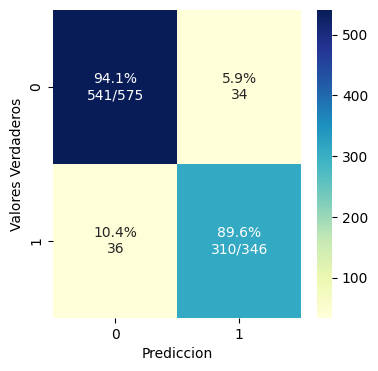

In [90]:
plot_cm(predictions, y_test)

In [101]:
tn, fp, fn, tp = confusion_matrix(predictions, y_test).ravel()
specificity = tn / (tn+fp)

In [72]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

rcKNN = recall_score(predictions, y_test)
acKNN = accuracy_score(predictions, y_test)
f1KNN = f1_score(predictions, y_test)
psKNN = precision_score(predictions, y_test)

In [102]:
print("Métricas de K-NN - 5 vecinos.")
print("Recall (Sensibilidad o Exhaustividad):",round(rcKNN*100,3),"%.")
print("Accuracy (Exactitud):",round(acKNN*100,3),"%.")
print("Precision (Precisión):",round(psKNN*100,3),"%.")
print("Specifity:",round(specificity*100,3),"%.")
print("F1:",round(f1KNN*100,3),"%.")

Métricas de K-NN - 5 vecinos.
Recall (Sensibilidad o Exhaustividad): 89.595 %.
Accuracy (Exactitud): 92.4 %.
Precision (Precisión): 90.116 %.
Specifity: 94.087 %.
F1: 89.855 %.


In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       575
           1       0.90      0.90      0.90       346

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



### Determinación del valor de K

In [37]:
error_rate = []

for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))


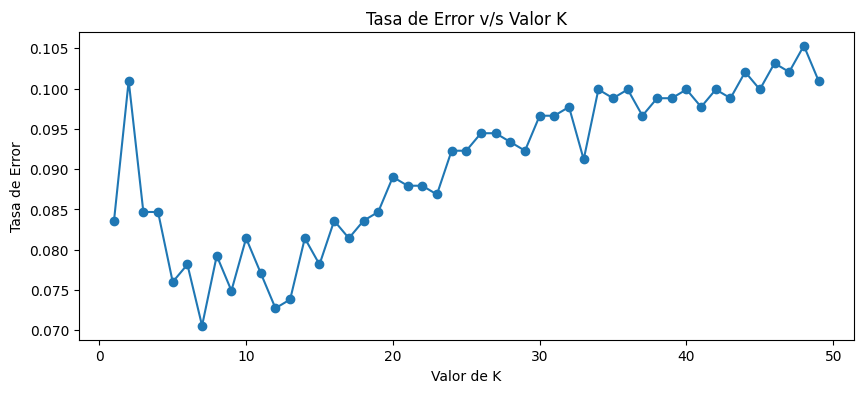

In [104]:
plt.figure(figsize = (10,4))

plt.plot(range(1,50), error_rate, marker ='o')
plt.title('Tasa de Error v/s Valor K')
plt.xlabel('Valor de K')
plt.ylabel('Tasa de Error')
plt.show()

### Entrenamiento con el valor de K seleccionado = 7.

In [76]:
knn_tuning = KNeighborsClassifier(n_neighbors = 7)

In [77]:
knn_tuning.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [78]:
predictions_2 = knn_tuning.predict(X_test)

### Métricas con el valor de K seleccionado = **7**.

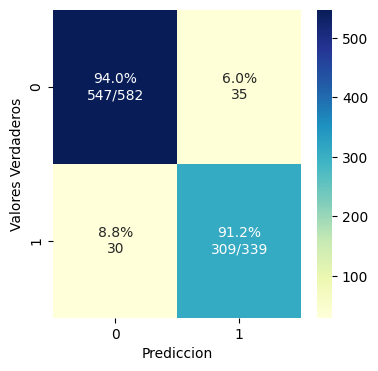

In [88]:
plot_cm(predictions_2, y_test)

In [99]:
tn, fp, fn, tp = confusion_matrix(predictions_2, y_test).ravel()
specificity2 = tn / (tn+fp)

In [93]:
rcKNN2 = recall_score(predictions_2, y_test)
acKNN2 = accuracy_score(predictions_2, y_test)
f1KNN2 = f1_score(predictions_2, y_test)
psKNN2 = precision_score(predictions_2, y_test)

In [103]:
print("Métricas de K-NN - 7 vecinos.")
print("Recall (Sensibilidad o Exhaustividad):",round(rcKNN2*100,3),"%.")
print("Accuracy (Exactitud):",round(acKNN2*100,3),"%.")
print("Precision (Precisión):",round(psKNN2*100,3),"%.")
print("Specifity:",round(specificity2*100,3),"%.")
print("F1:",round(f1KNN2*100,3),"%.")

Métricas de K-NN - 7 vecinos.
Recall (Sensibilidad o Exhaustividad): 91.15 %.
Accuracy (Exactitud): 92.942 %.
Precision (Precisión): 89.826 %.
Specifity: 93.986 %.
F1: 90.483 %.


In [79]:
print(classification_report(predictions_2, y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       582
           1       0.90      0.91      0.90       339

    accuracy                           0.93       921
   macro avg       0.92      0.93      0.92       921
weighted avg       0.93      0.93      0.93       921

